# Introduction
The owner of a chain of over 100 shops in the UK has asked you to build a machine learning 
model capable of classifying stores as having either good or bad performance based on details 
about the store. For each store, the company has recorded data on performance (simply ‘good’ 
or ‘bad’) and details such as the size of the store and the number of staff it employs.

# Task
Develop a logistic regression and decision tree models that will identify
whether stores will perform well or poorly by using python. 

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    roc_auc_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_curve,
)

In [2]:
# loading the dataset
df = pd.read_csv("storedata.csv")
df

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vit�ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Mat�as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad


In [3]:
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [4]:
df.tail()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
131,South Benfleet,UK,96853,Vit�ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Mat�as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad
135,Stapleford,UK,99854,Lea,9,14468,111,Yes,18,High Street,1706344,1307752,1159859,1020940,8,276,18,13,Good


In [5]:
df.shape

(136, 19)

The data contains 136 rows and 19 columns respectively

In [6]:
#checking the data types
df.dtypes

Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store ID,136.0,5.217258e+04,28725.990237,1437.0,24707.25,56011.5,76870.50,99854.0
Staff,136.0,1.335294e+01,56.592439,-2.0,6.00,7.0,8.00,600.0
Floor Space,136.0,1.502410e+04,2761.801921,10072.0,12793.00,14596.5,17543.75,19869.0
Window,136.0,1.120441e+02,6.884085,100.0,106.75,111.0,118.00,124.0
Demographic score,136.0,1.446324e+01,2.874944,10.0,12.00,14.5,17.00,19.0
40min population,136.0,1.487374e+06,280498.938383,1030405.0,1254949.25,1516337.5,1696352.50,1997044.0
30 min population,136.0,1.249870e+06,216087.516523,1000653.0,1057284.00,1214459.0,1396966.75,1929089.0
20 min population,136.0,1.134533e+06,149027.970296,1000214.0,1012572.75,1077542.0,1203076.75,1723395.0
10 min population,136.0,1.066118e+06,88845.853887,1000002.0,1005593.00,1033228.5,1090349.00,1426533.0
Store age,136.0,6.529412e+00,2.815147,2.0,4.00,6.0,9.00,11.0


observations
1. There are 136 towns
2. it happened in both Uk and France but UK is the most popular country where it happened 
3. The average number of staff recorded is 7 while the maximum is 600
4. The maximum store age is 11 while the minimum is 2

In [8]:
#checking for duplicates
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [10]:
# changing all columns to lower case
df1 = df.rename(columns = str.lower)
df1.head()

,town,country,store id,manager name,staff,floor space,window,car park,demographic score,location,40min population,30 min population,20 min population,10 min population,store age,clearance space,competition number,competition score,performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [11]:
# renaming columns head properly
df1 = df1.rename(columns = {'store id': 'store_id', 'manager name': 'manager_name', 'floor space': 'floor_space',
                    'car park': 'car_park', 'demographic score':'demographic_score', '40min population':'40min_population',
                    '30 min population':'30min_population', '20 min population':'20min_population',
                    '10 min population':'10min_population', 'store age':'store_age', 'clearance space':'clearance_space',
                    'competition number': 'competition_number', 'competition score': 'competition_score'})
df1.head()

,town,country,store_id,manager_name,staff,floor_space,window,car_park,demographic_score,location,40min_population,30min_population,20min_population,10min_population,store_age,clearance_space,competition_number,competition_score,performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [12]:
#checking fro the unique values for objects
df1['country'].unique()

array(['UK', 'France'], dtype=object)

In [13]:
df1['car_park'].unique()

array(['Yes', 'No', 'Y', 'N'], dtype=object)

In [14]:
df1['performance'].unique()

array(['Good', 'Bad'], dtype=object)

In [15]:
# treating the car_park column to be balanced
df1['car_park'] = df1['car_park'].replace(['Y', 'N'],['Yes', 'No'])

In [16]:
df1['car_park'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df1.head(2)

,town,country,store_id,manager_name,staff,floor_space,window,car_park,demographic_score,location,40min_population,30min_population,20min_population,10min_population,store_age,clearance_space,competition_number,competition_score,performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good


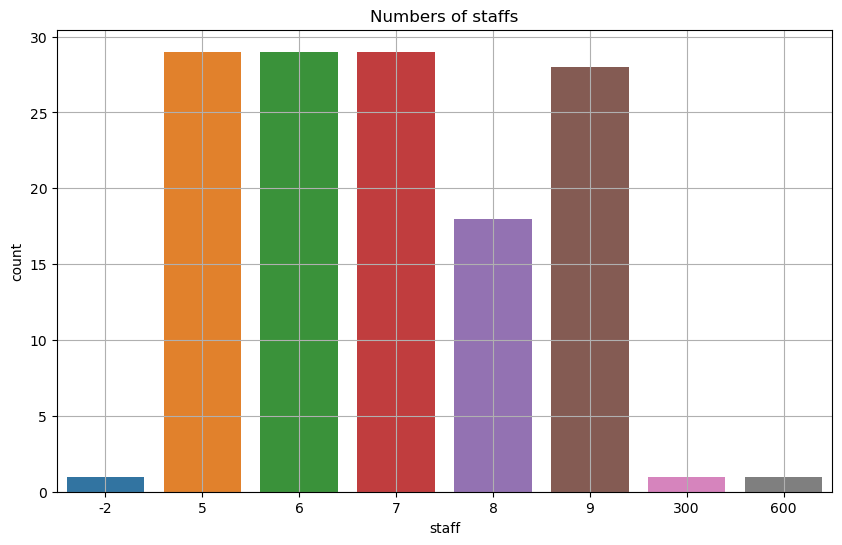

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x ='staff', data =df1)
plt.title("Numbers of staffs")
plt.xticks(rotation = 0)
plt.grid()

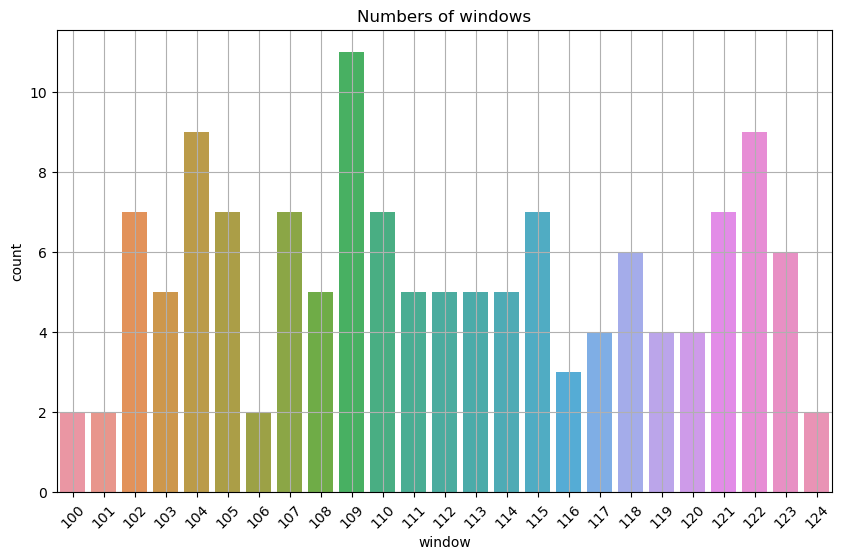

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x ='window', data =df1)
plt.title("Numbers of windows")
plt.xticks(rotation = 45)
plt.grid()

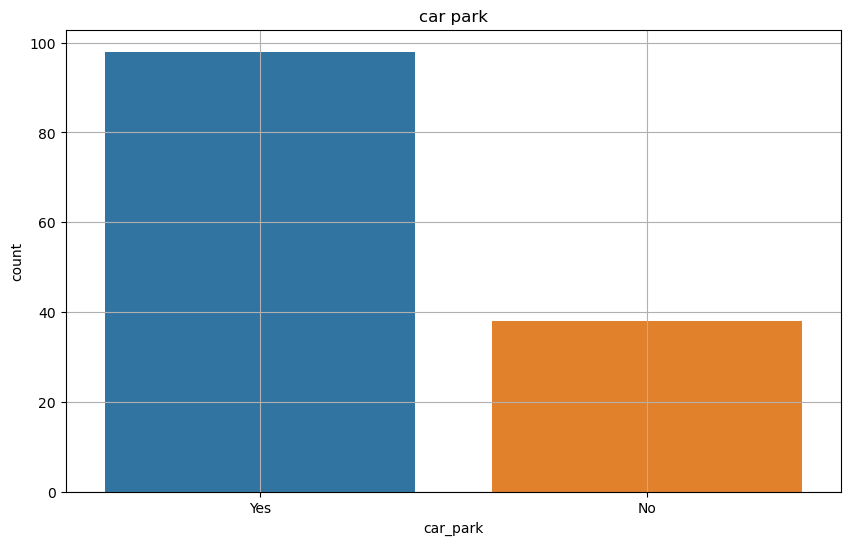

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x ='car_park', data =df1)
plt.title("car park")
plt.xticks(rotation = 0)
plt.grid()

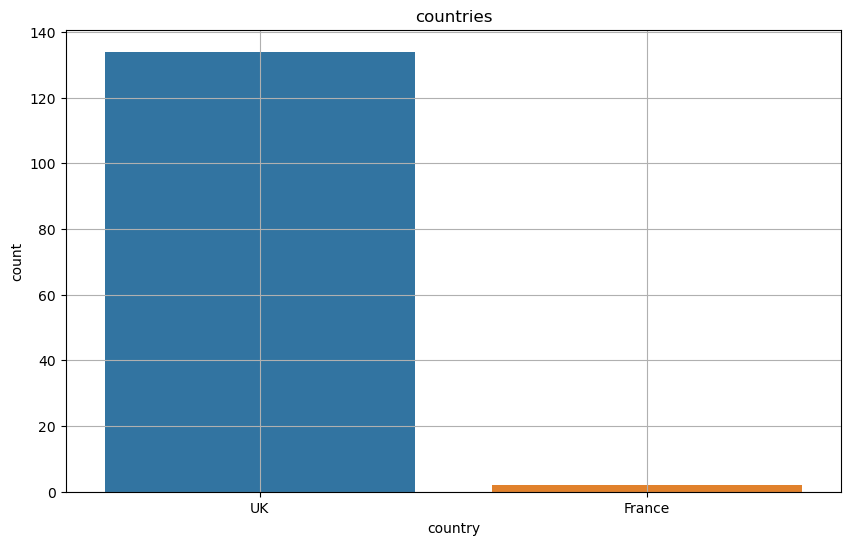

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x ='country', data =df1)
plt.title("countries")
plt.xticks(rotation = 0)
plt.grid()

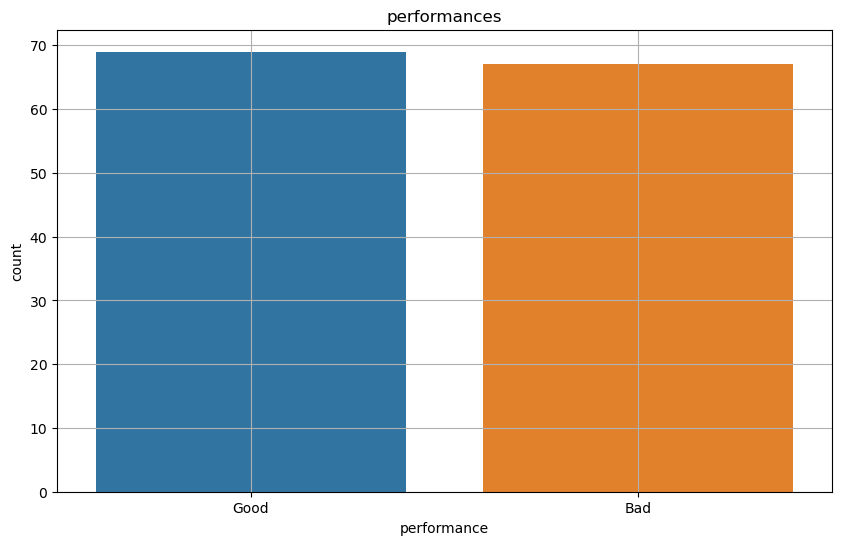

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x ='performance', data =df1)
plt.title("performances")
plt.xticks(rotation = 0)
plt.grid()

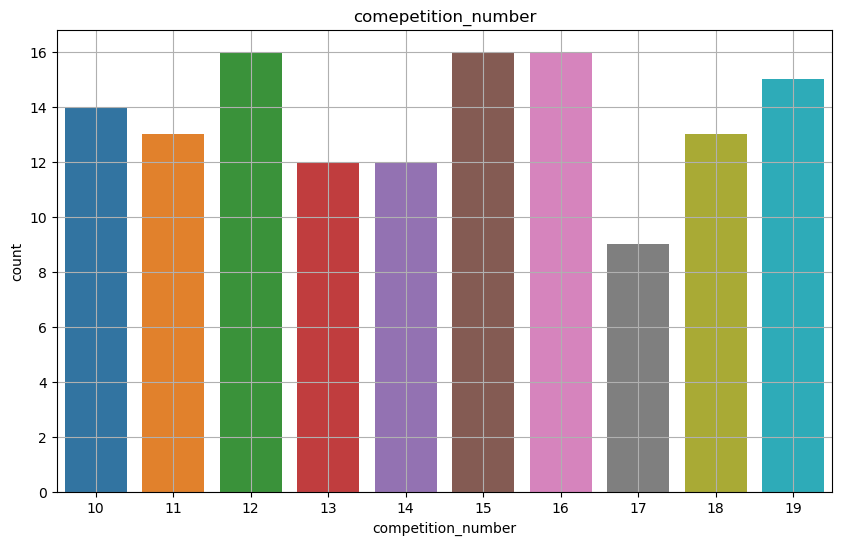

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x ='competition_number', data =df1)
plt.title("comepetition_number")
plt.xticks(rotation = 0)
plt.grid()

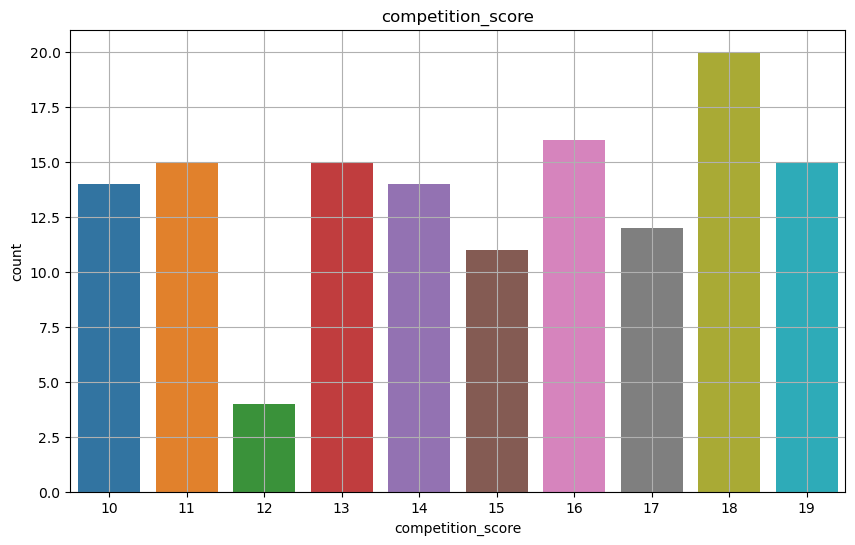

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x ='competition_score', data =df1)
plt.title("competition_score")
plt.xticks(rotation = 0)
plt.grid()

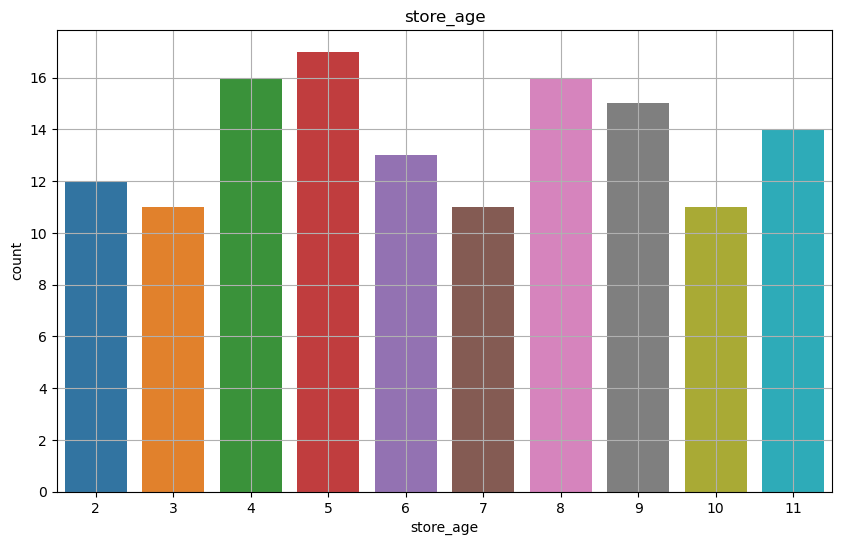

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'store_age', data =df1)
plt.title("store_age")
plt.xticks(rotation = 0)
plt.grid()

# observation from the univariate analysis
1. it was observed that the highest number of staff employed are 5,6,7 and 9
2. the highest number of window is 109
3. the store has more car park
4. the perfromance are both closely related 
5. considering the country, the store seems to be located most in the uk than france
6. considering the age of the stores in years, the top highest are 4, 5 and 8

In [26]:
#checking for outliers and change some columns to integers from objects 

In [27]:
df1.head(2)

,town,country,store_id,manager_name,staff,floor_space,window,car_park,demographic_score,location,40min_population,30min_population,20min_population,10min_population,store_age,clearance_space,competition_number,competition_score,performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good


In [28]:
df1 = df1.drop(['store_id', 'manager_name'], axis = 1)

In [29]:
df1['staff'] = df1['staff'].astype(str).astype(int)
df1['floor_space'] = df1['floor_space'].astype(str).astype(int)
df1['window'] = df1['window'].astype(str).astype(int)
df1['40min_population'] = df1['40min_population'].astype(str).astype(int)
df1['30min_population'] = df1['30min_population'].astype(str).astype(int)
df1['20min_population'] = df1['20min_population'].astype(str).astype(int)
df1['10min_population'] = df1['10min_population'].astype(str).astype(int)
df1['store_age'] = df1['store_age'].astype(str).astype(int)
df1['clearance_space'] = df1['clearance_space'].astype(str).astype(int)
df1['competition_number'] = df1['competition_number'].astype(str).astype(int)
df1['competition_score'] = df1['competition_score'].astype(str).astype(int)

In [30]:
df.dtypes

Town                  object
Country               object
Store ID               int64
Manager name          object
Staff                  int64
Floor Space            int64
Window                 int64
Car park              object
Demographic score      int64
Location              object
40min population       int64
30 min population      int64
20 min population      int64
10 min population      int64
Store age              int64
Clearance space        int64
Competition number     int64
Competition score      int64
Performance           object
dtype: object

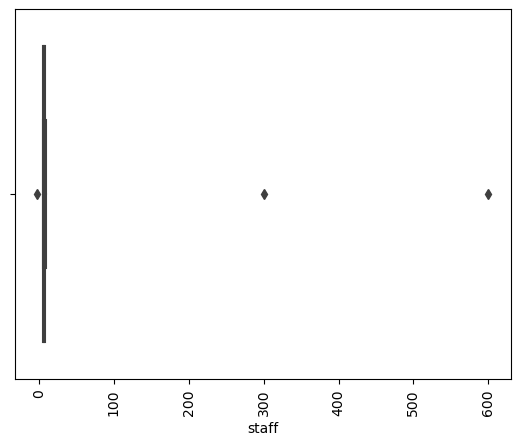

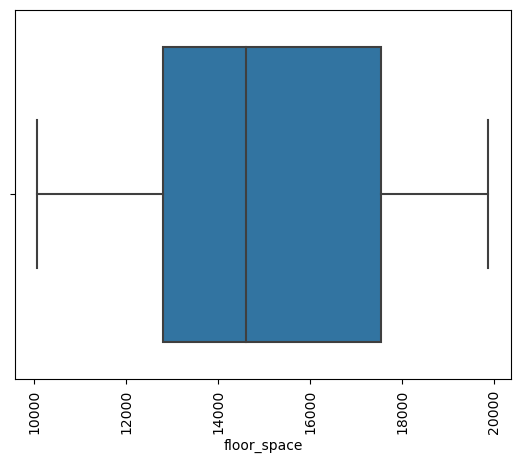

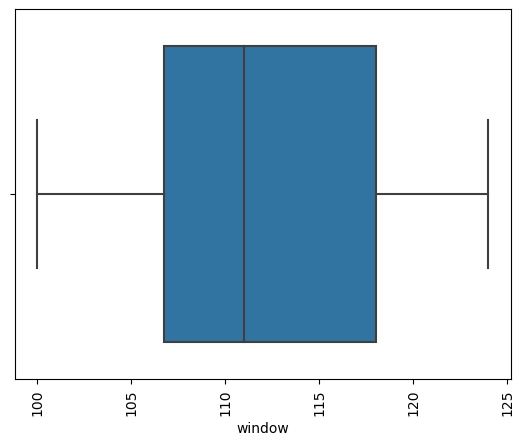

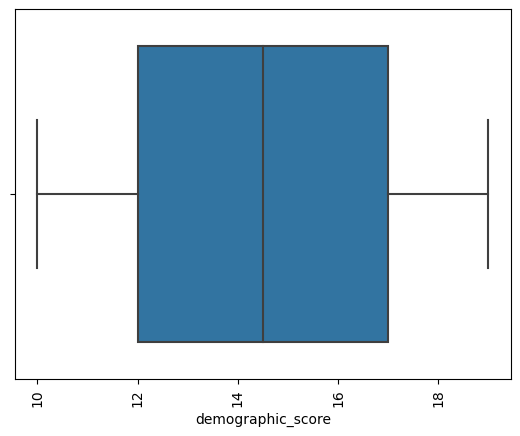

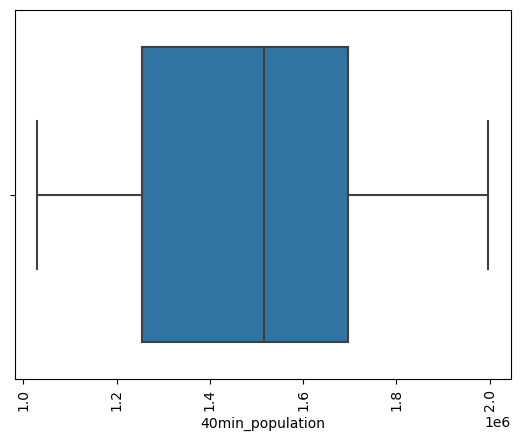

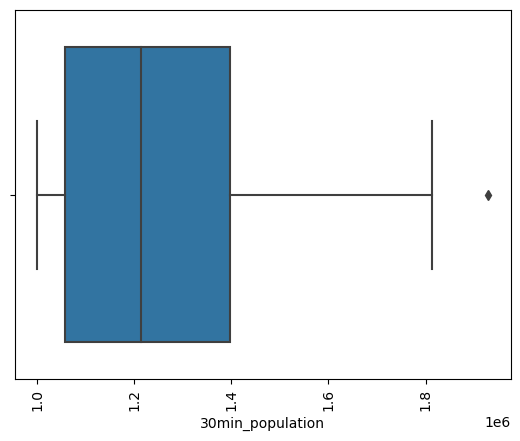

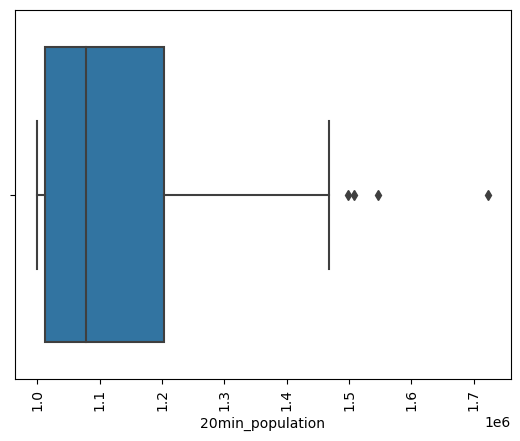

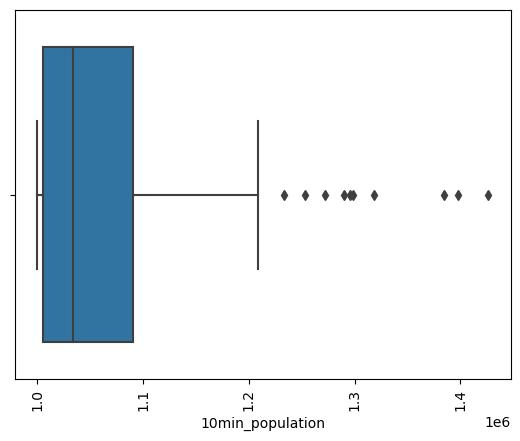

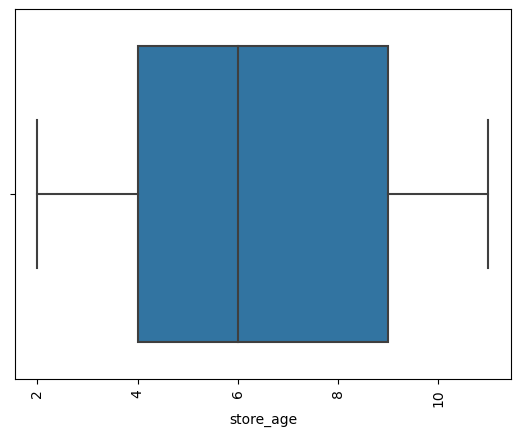

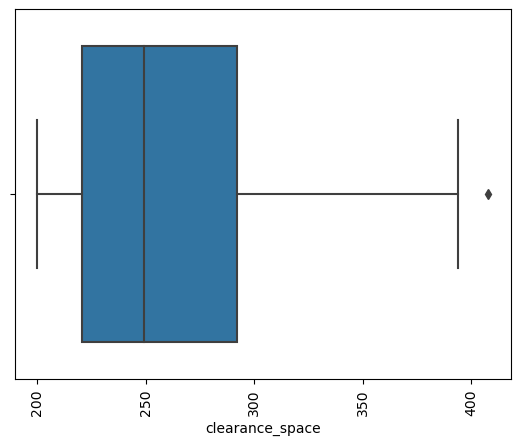

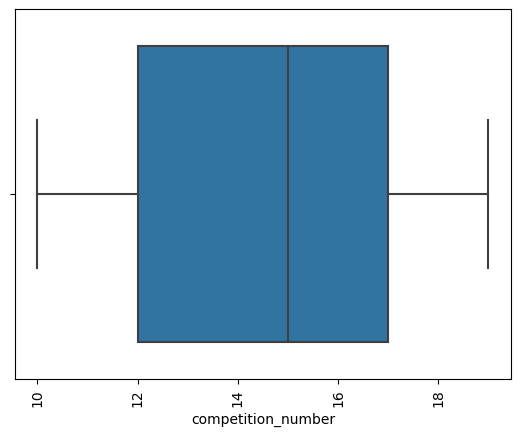

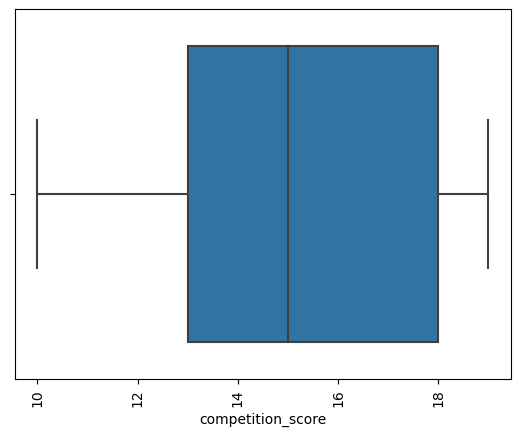

In [31]:
#checking for outliers in the dataset by plotting box plot
num_cols = df1.select_dtypes(include = np.number).columns.tolist()
for i, variable in enumerate(num_cols):
    plt.xticks(rotation = 90)
    sns.boxplot(data = df1, x = variable)
    plt.show()

In [32]:
#using scattterplot to view few columns to detect outliers for better understanding

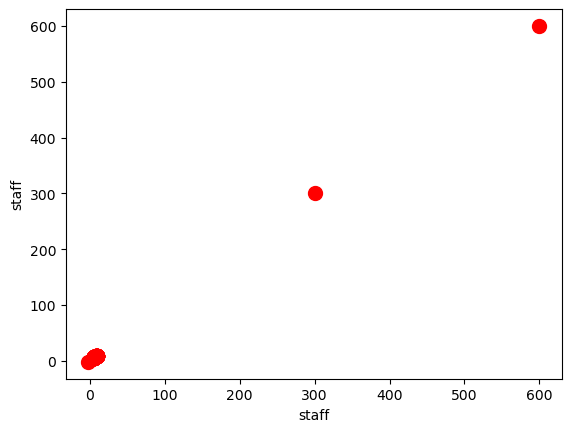

In [33]:
df1.plot.scatter(x = 'staff', y = 'staff', s = 100, c = 'red' );

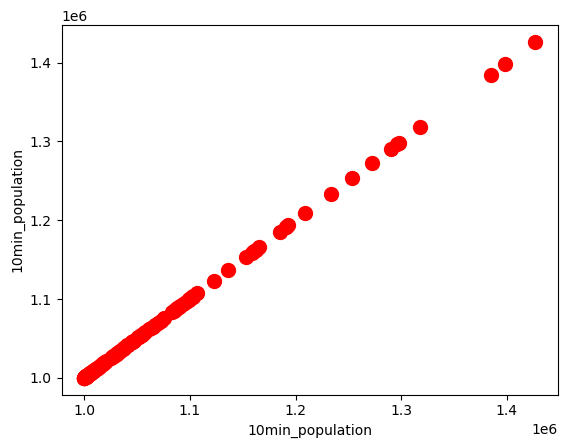

In [34]:
df1.plot.scatter(x = '10min_population', y = '10min_population', s = 100, c = 'red' );

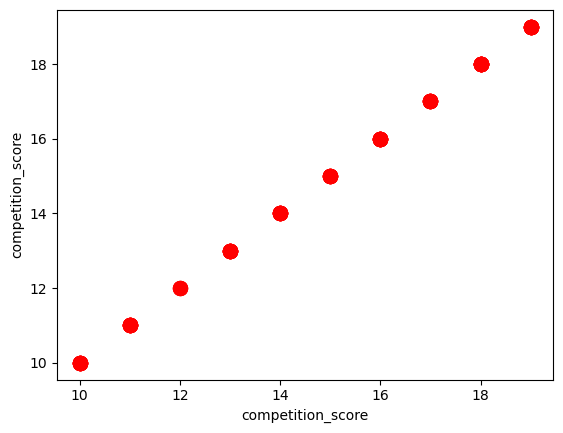

In [35]:
df1.plot.scatter(x = 'competition_score', y = 'competition_score', s = 100, c = 'red' );

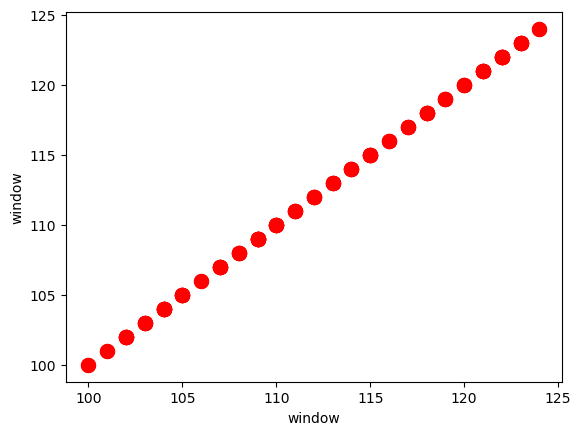

In [36]:
df1.plot.scatter(x = 'window', y = 'window', s = 100, c = 'red' );

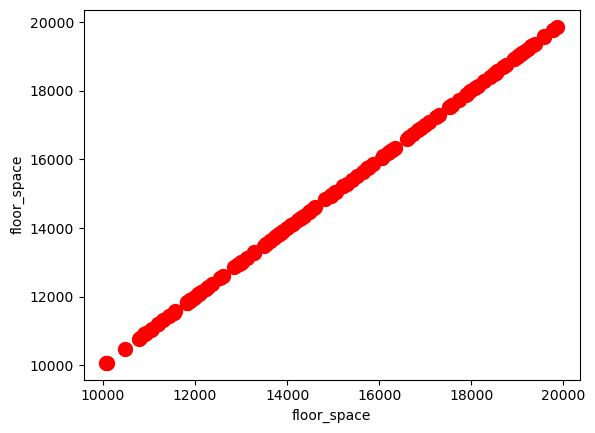

In [37]:
df1.plot.scatter(x = 'floor_space', y = 'floor_space', s = 100, c = 'red' );

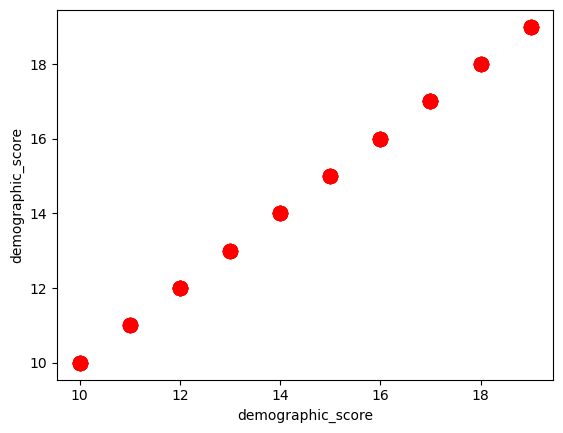

In [38]:
df1.plot.scatter(x = 'demographic_score', y = 'demographic_score', s = 100, c = 'red' );

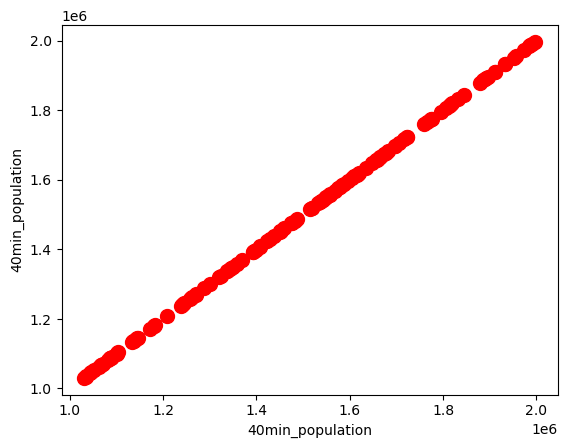

In [39]:
df1.plot.scatter(x = '40min_population', y = '40min_population', s = 100, c = 'red' );

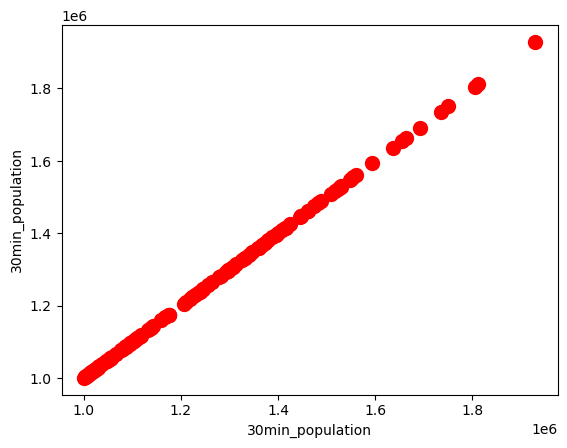

In [40]:
df1.plot.scatter(x = '30min_population', y = '30min_population', s = 100, c = 'red' );

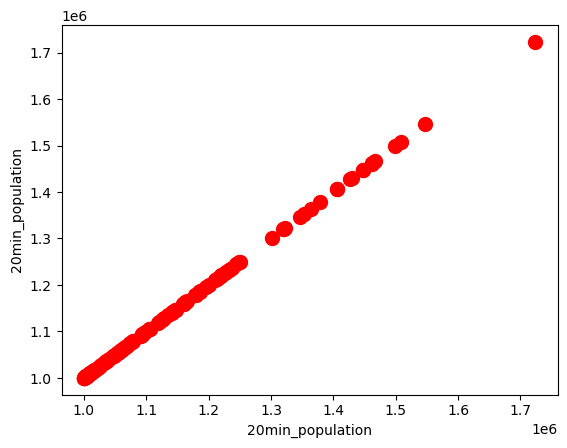

In [41]:
df1.plot.scatter(x = '20min_population', y = '20min_population', s = 100, c = 'red' );

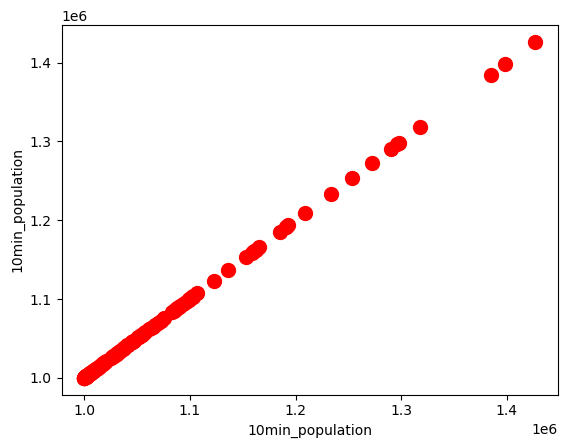

In [42]:
df1.plot.scatter(x = '10min_population', y = '10min_population', s = 100, c = 'red' );

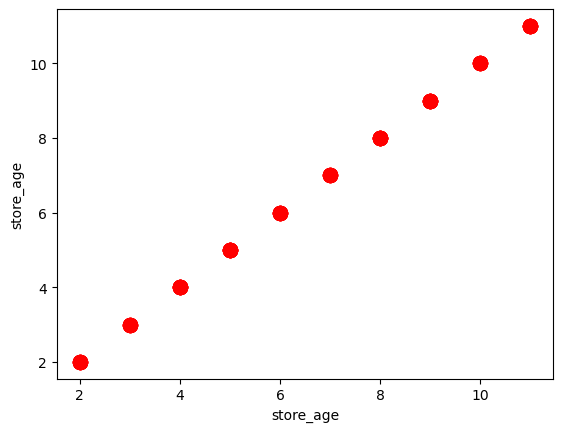

In [43]:
df1.plot.scatter(x = 'store_age', y = 'store_age', s = 100, c = 'red' );

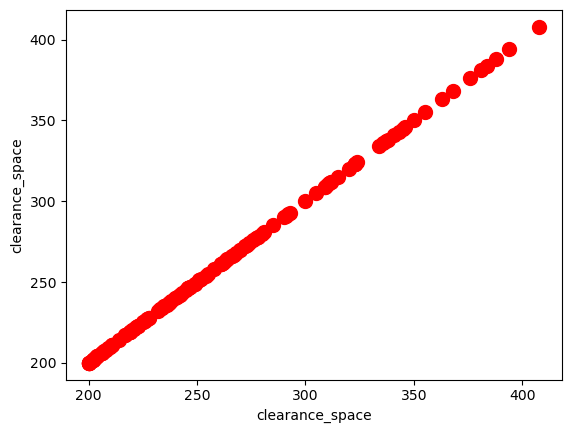

In [44]:
df1.plot.scatter(x = 'clearance_space', y = 'clearance_space', s = 100, c = 'red' );

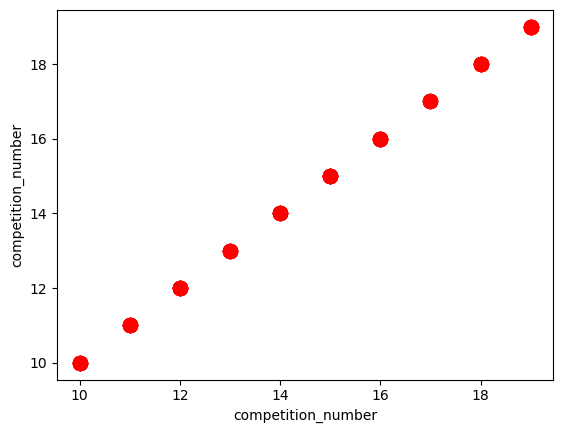

In [45]:
df1.plot.scatter(x = 'competition_number', y = 'competition_number', s = 100, c = 'red' );

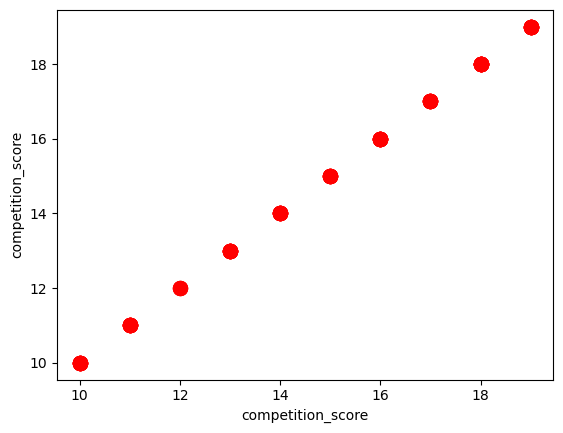

In [46]:
df1.plot.scatter(x = 'competition_score', y = 'competition_score', s = 100, c = 'red' );

observation
1. looking at both the scatter plot and the box plot we can deduce that there are present of outliers in staff
2. 30min_population, 2omin_population and 10min_population all have upper outliers while the rest has no outliers 

note: removing outliers will help us make the numerical results look better, certainly, but it will not help 
us to improve the accuracy of the forecast therefore we dont need to treat the outliers in this case 

In [47]:
# filtering objects and category type columns to check out properties
cat_columns = df1.describe(include=["object", "category"]).columns
cat_columns

Index(['town', 'country', 'car_park', 'location', 'performance'], dtype='object')

In [48]:
# getting to know the unique values for the categorical variables
for i in cat_columns:
    print("unique values in", i, "are :")
    print(df1[i].value_counts())
    print("*" * 50)

unique values in town are :
 Swinton (Greater Manchester)    1
 Shoreham-by-Sea                 1
 South Cave                      1
 Settle                          1
 Sleaford                        1
                                ..
 Stainforth                      1
 Swindon                         1
 Stanford-le-Hope                1
 Shefford                        1
 Stapleford                      1
Name: town, Length: 136, dtype: int64
**************************************************
unique values in country are :
UK        134
France      2
Name: country, dtype: int64
**************************************************
unique values in car_park are :
Yes    98
No     38
Name: car_park, dtype: int64
**************************************************
unique values in location are :
Shopping Centre    52
Retail Park        43
High Street        40
Village             1
Name: location, dtype: int64
**************************************************
unique values in performance

observation
1. we have different town present in both the Uk and France
2. for country where the store is located we have more in uk which is 134 while 2 in france
3. there were enough car park in some stores than some stores that doesnt have a car park
4. considering the types of location for the stores we have 4 types of location
5. we have two types of perfromance which is good or bad

# Bivariate analysis

In [49]:
df1['country'].value_counts()

UK        134
France      2
Name: country, dtype: int64

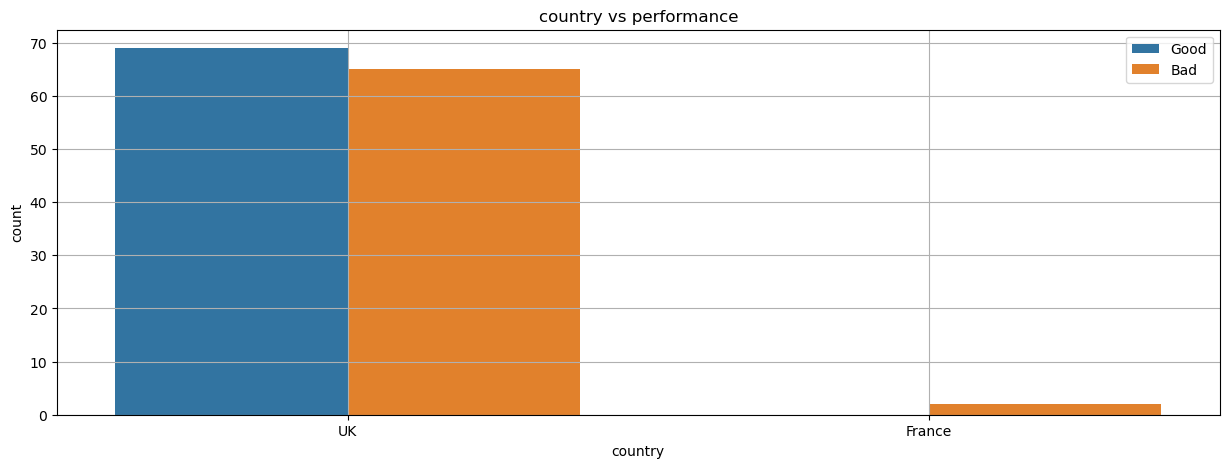

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'country', hue = 'performance', data = df1)
plt.title("country vs performance")
plt.legend(fontsize=10)
plt.grid()

In [51]:
df1['location'].value_counts()

Shopping Centre    52
Retail Park        43
High Street        40
Village             1
Name: location, dtype: int64

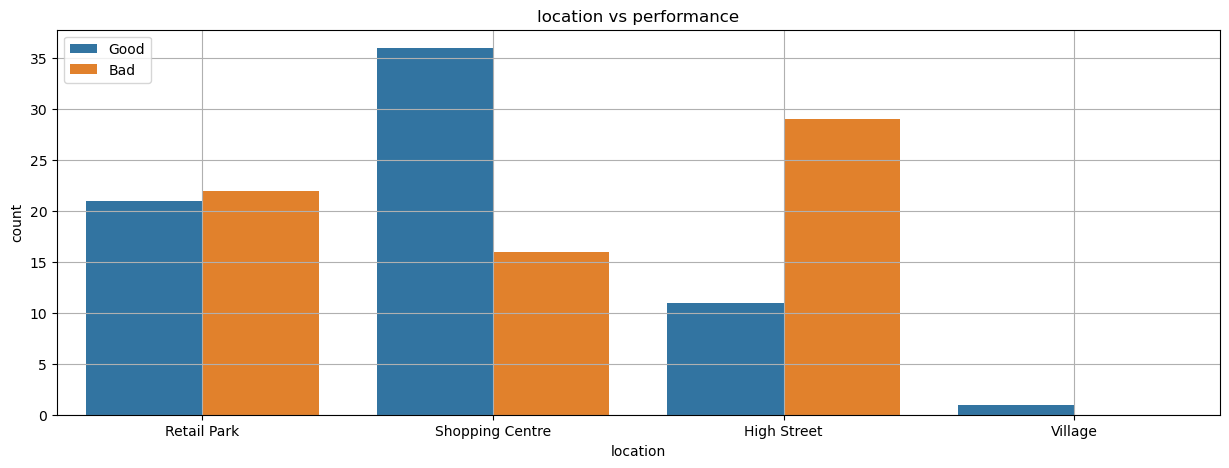

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'location', hue = 'performance', data = df1)
plt.title("location vs performance")
plt.legend(fontsize=10)
plt.grid()

In [53]:
df1['car_park'].value_counts()

Yes    98
No     38
Name: car_park, dtype: int64

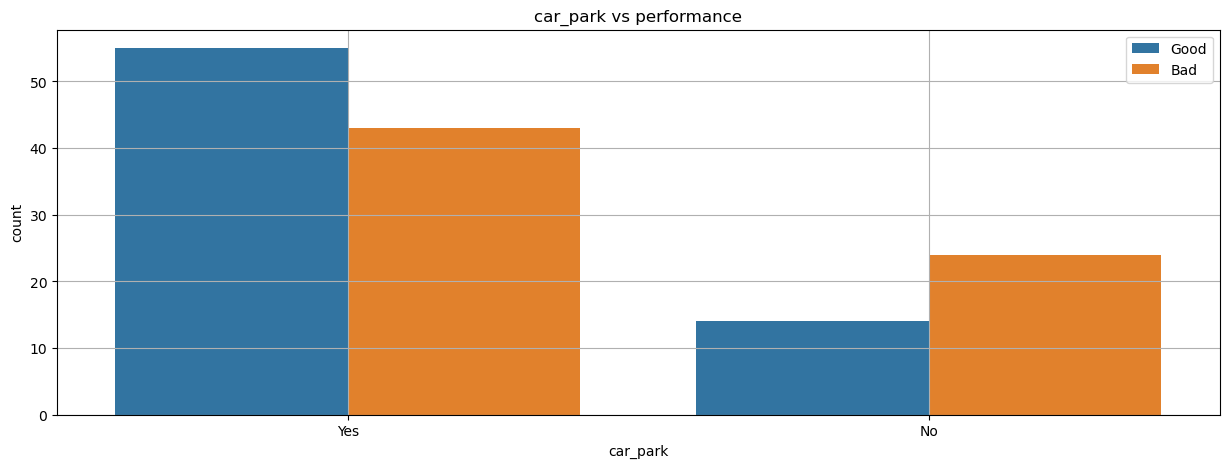

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'car_park', hue = 'performance', data = df1)
plt.title("car_park vs performance")
plt.legend(fontsize=10)
plt.grid()

observation on the bivariate analysis above
1. the highest fraction of the location of the store came from UK which the performance is more favourable while the least came from France
2. some stores had car park while some does not have and the fraction of teh store that has car park is much more than the store that doesnt have car park which seems not to be okay considering the perfromance
3. shopping centre had the highest perfromance while considering the location of the store while village had the least

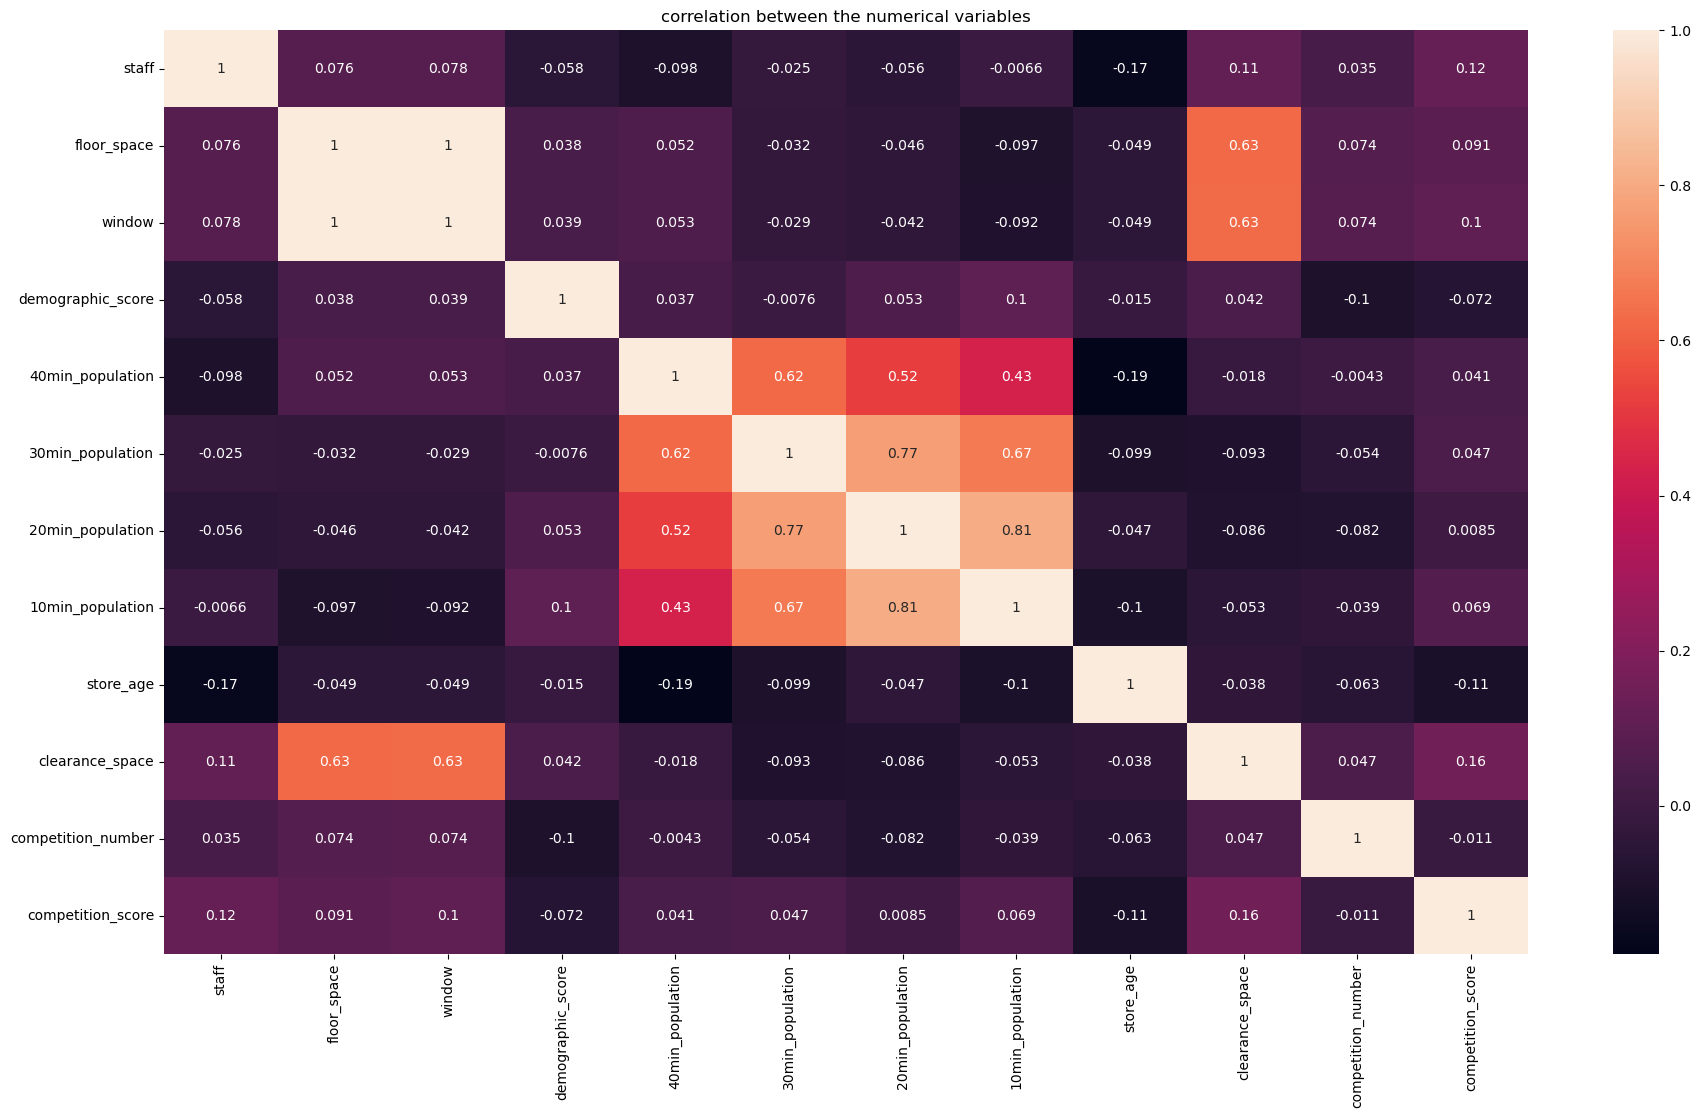

In [55]:
# checking for the correlation through heatmap
# visualizing the dataset by drwaing correlation map
corr = df1.corr()
corr
plt.figure(figsize = (22, 12))
sns.heatmap(corr, annot = True)
plt.title("correlation between the numerical variables")
plt.show()

<Figure size 1200x800 with 0 Axes>

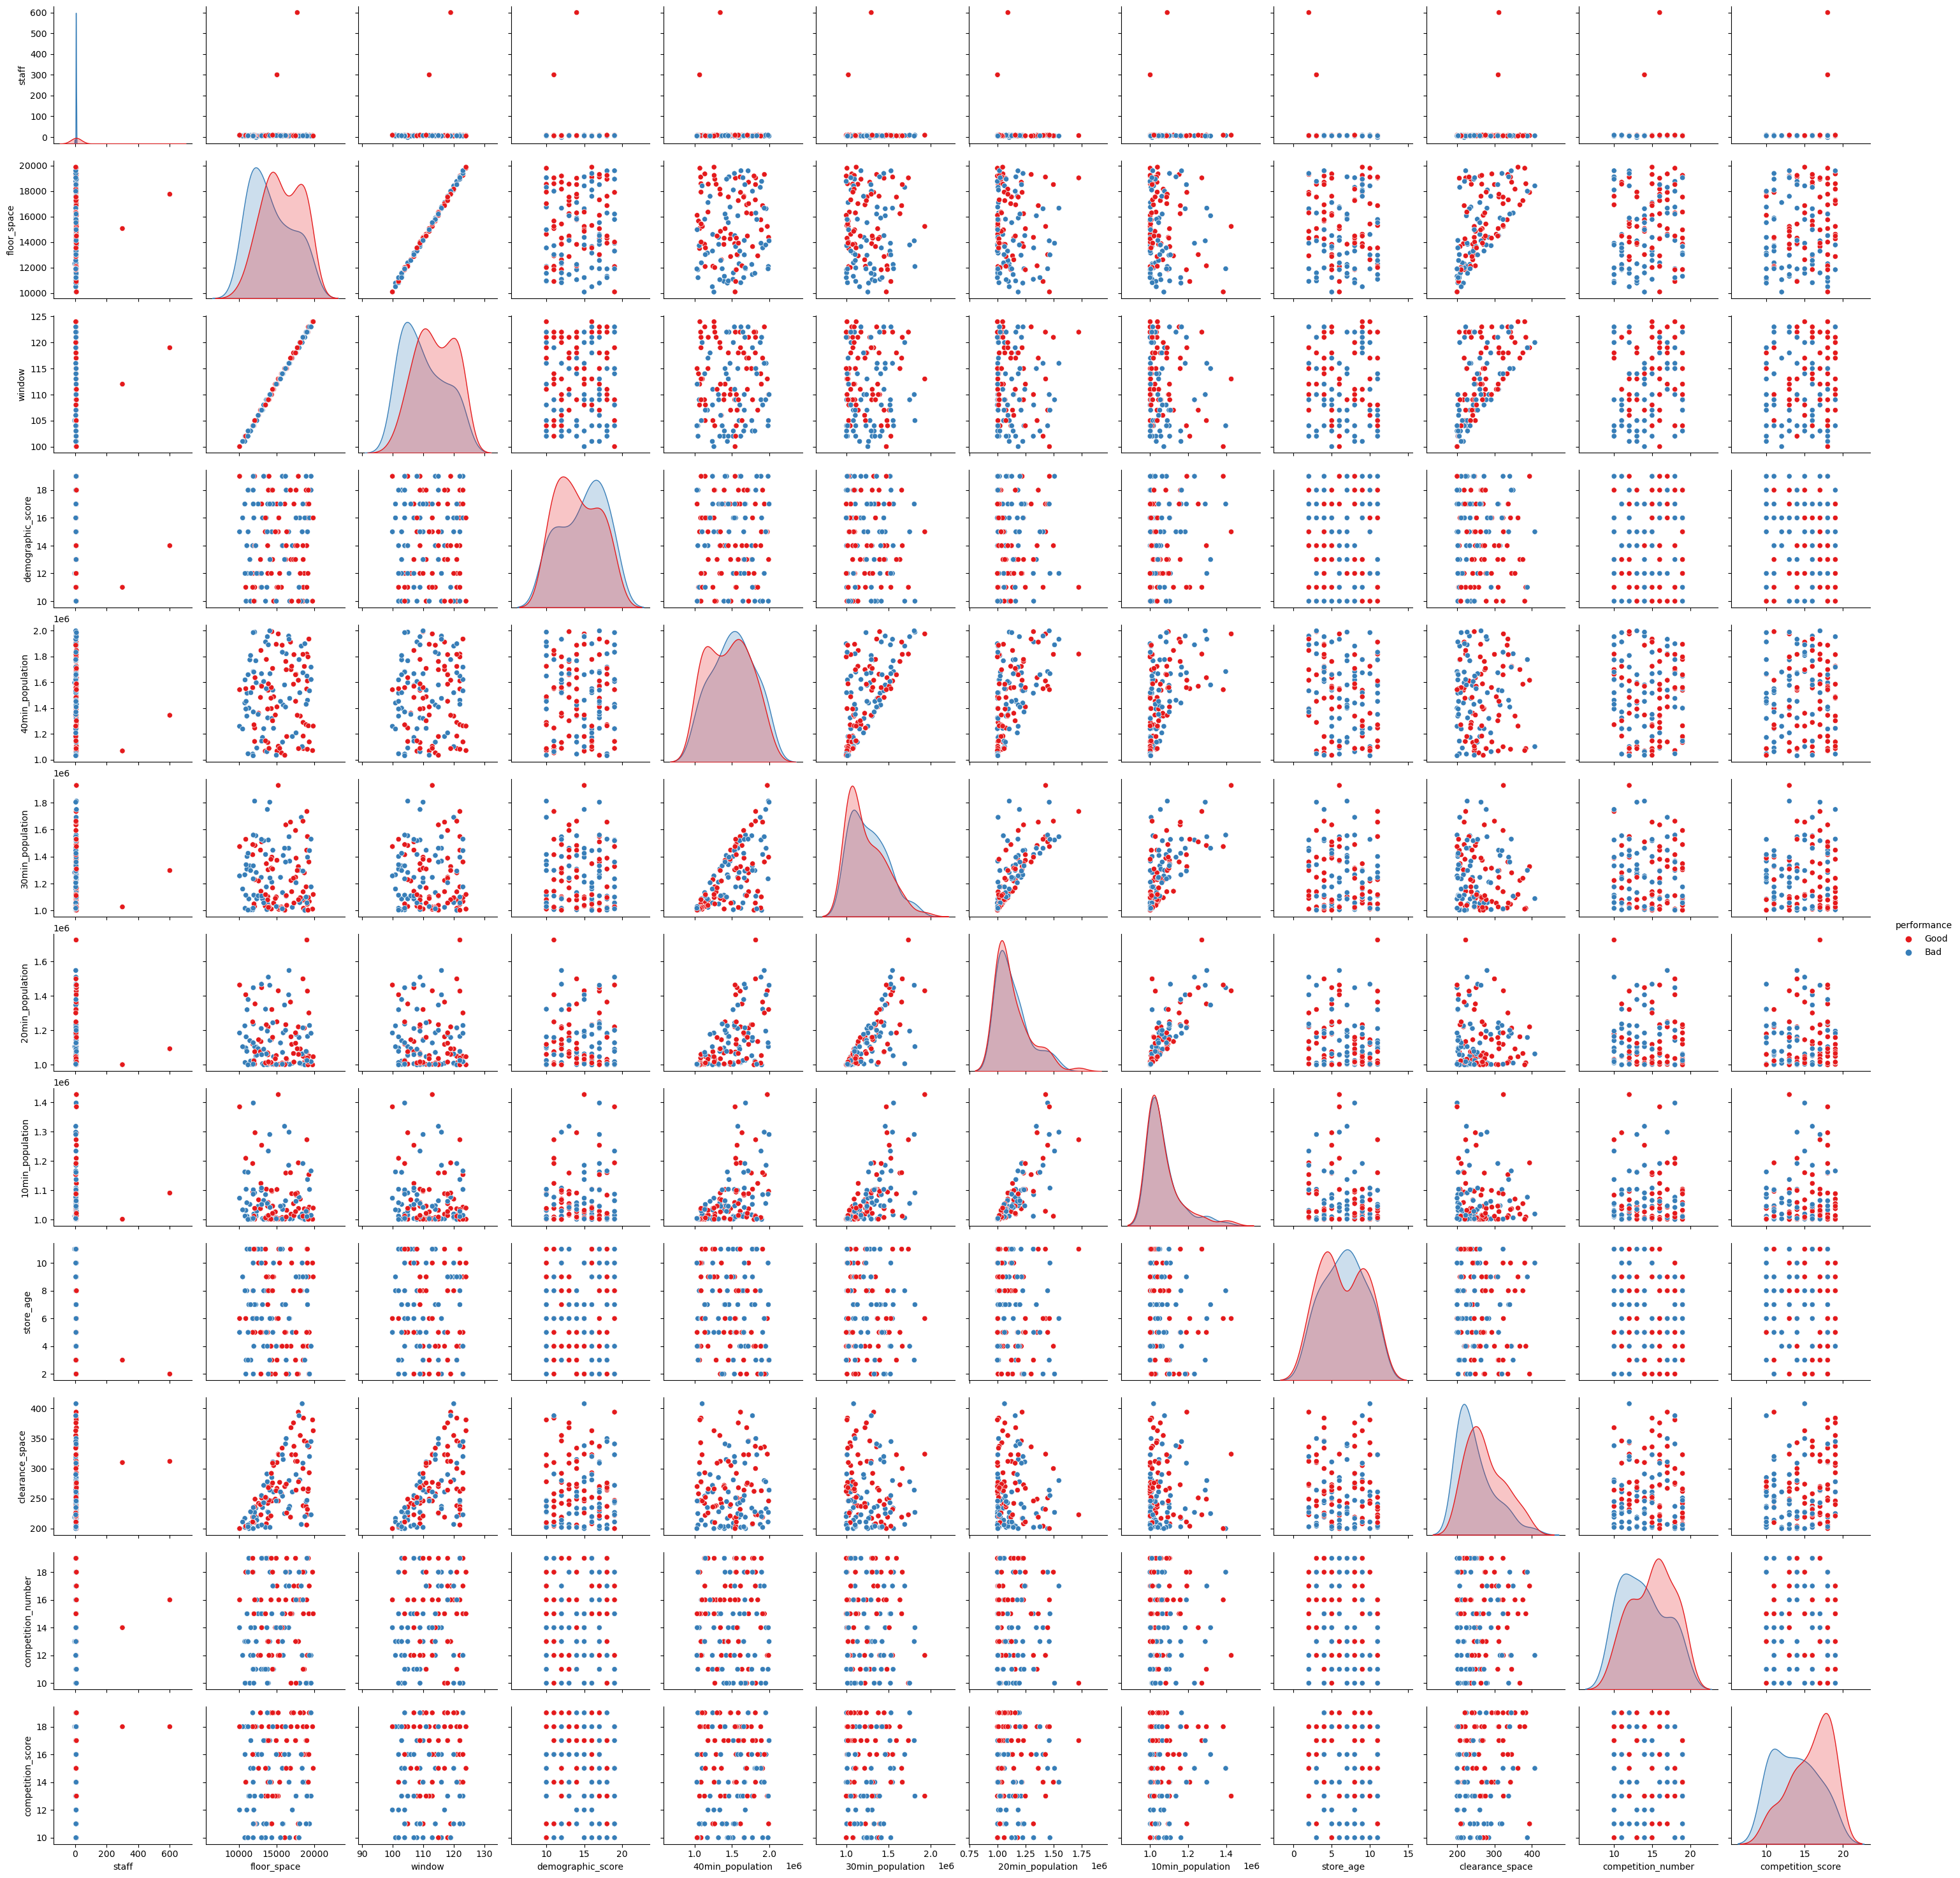

In [56]:
plt.figure(figsize = (12, 8))
sns.pairplot(df1, hue = 'performance', palette = 'Set1')

In [57]:
# data preprocessing
df2 = df1.select_dtypes(include = [object])
df2.head()

,town,country,car_park,location,performance
0,Swinton (Greater Manchester),UK,Yes,Retail Park,Good
1,Stamford,UK,Yes,Shopping Centre,Good
2,Skipton,UK,No,Retail Park,Bad
3,Stratton,UK,No,High Street,Bad
4,Shepperton,UK,No,Retail Park,Bad


In [58]:
prk = df2.groupby("car_park").size()
print(prk)

car_park
No     38
Yes    98
dtype: int64


In [59]:
location = df2.groupby("location").size()
print(location)

location
High Street        40
Retail Park        43
Shopping Centre    52
Village             1
dtype: int64


In [60]:
country = df2.groupby("country").size()
print(country)

country
France      2
UK        134
dtype: int64


In [61]:
performance = df2.groupby("performance").size()
print(performance)

performance
Bad     67
Good    69
dtype: int64


In [62]:
# perform encoding 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_3 = df2.apply(le.fit_transform)
df_3.head(4)

,town,country,car_park,location,performance
0,132,1,1,1,1
1,95,1,1,2,1
2,52,1,0,1,0
3,115,1,0,0,0


In [63]:
cols = df_3.columns
for x in cols:
    df1[x] = df_3[x]
df1.head(5)

,town,country,staff,floor_space,window,car_park,demographic_score,location,40min_population,30min_population,20min_population,10min_population,store_age,clearance_space,competition_number,competition_score,performance
0,132,1,9,18526,121,1,10,1,1288374,1138224,1006986,1002340,3,238,16,16,1
1,95,1,8,18569,121,1,11,2,1086225,1015321,1012182,1008436,4,384,15,19,1
2,52,1,-2,12288,105,0,12,1,1595638,1281661,1104490,1011395,11,219,13,18,0
3,115,1,7,17092,117,0,14,0,1179395,1022959,1009496,1002169,5,261,15,12,0
4,32,1,7,11307,103,0,18,1,1398558,1085170,1003137,1002513,7,200,19,13,0


# prepare data for modelling

In [64]:
x = df1.drop('performance', axis = 1)
y = df1['performance']

In [65]:
y

0      1
1      1
2      0
3      0
4      0
      ..
131    0
132    0
133    0
134    0
135    1
Name: performance, Length: 136, dtype: int32

In [66]:
x

,town,country,staff,floor_space,window,car_park,demographic_score,location,40min_population,30min_population,20min_population,10min_population,store_age,clearance_space,competition_number,competition_score
0,132,1,9,18526,121,1,10,1,1288374,1138224,1006986,1002340,3,238,16,16
1,95,1,8,18569,121,1,11,2,1086225,1015321,1012182,1008436,4,384,15,19
2,52,1,-2,12288,105,0,12,1,1595638,1281661,1104490,1011395,11,219,13,18
3,115,1,7,17092,117,0,14,0,1179395,1022959,1009496,1002169,5,261,15,12
4,32,1,7,11307,103,0,18,1,1398558,1085170,1003137,1002513,7,200,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,61,1,7,14120,110,1,13,1,1665074,1240813,1141898,1041041,6,202,18,14
132,12,1,6,11205,103,0,15,2,1657769,1424404,1378708,1160929,5,203,13,18
133,29,1,7,16190,115,0,19,2,1407456,1359511,1200486,1063718,7,341,18,18
134,2,1,6,15516,113,0,17,0,1451087,1245725,1127276,1045154,11,261,14,10


In [67]:
# splitting data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 1)

In [68]:
# performing feature scaling on our training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting and transfroming x_train while transfroming the x_test

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [69]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [70]:
log_reg.classes_
log_reg.coef_

array([[ 0.27092449,  0.22107781,  0.40450987,  0.21932949,  0.40712474,
         0.211575  , -0.48936705,  0.75792836, -0.67804677, -0.25426007,
         0.3891828 ,  0.33287809,  0.02551071, -0.13064684,  0.48894476,
         0.90118388]])

In [71]:
y_pred_class = log_reg.predict(x_test).astype(float)
# pred_class = np.array(y_pred_class.values.tolist())
y_pred_class

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1.])

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_class)
confusion_matrix

array([[16,  5],
       [ 6, 14]], dtype=int64)

Accuracy of this is calculated by 16 + 14 i.e the two total correct predictions (TP + TN) divided by the number of a dataset (P  + N). In this case, the TP and the TN when added together gives 30 which is higher than the FP and FN. This hows that it is a good model 

# Model building Logistic Regression

In [73]:
logit_model = sm.Logit(y,x).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.305828
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:            performance   No. Observations:                  136
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                           15
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.5587
Time:                        00:09:47   Log-Likelihood:                -41.593
converged:                       True   LL-Null:                       -94.253
Covariance Type:            nonrobust   LLR p-value:                 1.268e-15
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
town                   0.0052      0.008      0.650      0.516      -0.010       0.021
coun

In [74]:
from sklearn import metrics
def model_performance_classification_statsmodels(
    model, predictors, target, threshold = 0.5
):
    #checking fo the probabilities
    pred_temp = model.predict(predictors) > threshold
    pred = np.round(pred_temp)
    
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)
    
    df_perf = pd.DataFrame(
    {"Accuracy": acc, "Recall": recall, "precision": precision, "F1": f1,},
    index = [0],
    )
    return df_perf

In [75]:
print("training performance:")
model_performance_classification_statsmodels(log_reg, x_train, y_train)

training performance:


,Accuracy,Recall,precision,F1
0,0.747368,0.795918,0.735849,0.764706


observations from the result above

1. The model is fitted using maximum likelihood estimation method
2. The value of the pseudo R - square that predicts outcome is 0.5587 which is good enough because it is closer to 1
3. The coefficients are respective independent variables which can either be positive or negative and variables with negatative coefficients means that a unit increase in such variables will decrease the odds of a performance being bad
4. Other variables which have positive coefficients will cause the odds of bad performance to increase if a unit increase in observed 
5. F1 score which evaluates the model's accuracy is 0.76 which is pretty OK enough
6. The precision which measures how good our model is when it is positive is 0.74 which is considered to be good enough
7. The recall which measures how good our model is at correctly predicting positive classes and how many timesthe model was able to detect a specific category is 0.80
8. The variables used to build the model might contain multicollinearity which will affect the p- values and hypothesis test therefore we need to check for the vif

In [76]:
df1.head(2)

,town,country,staff,floor_space,window,car_park,demographic_score,location,40min_population,30min_population,20min_population,10min_population,store_age,clearance_space,competition_number,competition_score,performance
0,132,1,9,18526,121,1,10,1,1288374,1138224,1006986,1002340,3,238,16,16,1
1,95,1,8,18569,121,1,11,2,1086225,1015321,1012182,1008436,4,384,15,19,1


In [77]:
# remove multicollinearity
independent_variables = ['town', 'country', 'staff','floor_space', 'window', 'car_park', 'demographic_score',
                         'location', '40min_population','30min_population','20min_population','10min_population', 'store_age', 'clearance_space',
                         'competition_number', 'competition_score']      
# use the list to select a subset from original DataFrame
X = df1[independent_variables]
y = df1['performance']

In [78]:
# showing the calculation of the vif 
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range (x.shape[1])]
    
    return(vif)

In [79]:
x = df1.iloc[:,:-1]
calc_vif(x)

,variables,VIF
0,town,4.343698
1,country,73.284258
2,staff,1.162660
3,floor_space,169.022641
4,window,788.560369
5,car_park,3.979276
6,demographic_score,28.569658
7,location,3.063276
8,40min_population,53.603530
9,30min_population,114.300144


In [80]:
thresh = 10
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) 
    for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break
print ('Final variables:', independent_variables)

vif : [4.343698325316049, 73.28425840408352, 1.1626597560207723, 169.02264062947424, 788.5603687393873, 3.979276452147777, 28.569658119451123, 3.063275602942629, 53.60352982760044, 114.30014431060539, 249.28727878439167, 466.87629782080074, 7.239902144275755, 49.320876594676676, 27.2374580764028, 28.417667025168466]
dropping 'window' at index: 4
vif : [4.29599051648693, 63.26689339114968, 1.162631876491982, 52.307887400650934, 3.9579936947789403, 26.864865849113333, 3.0621813372632865, 53.00101312571909, 114.2859312021635, 242.97982884697777, 351.8377633869391, 6.745095620905568, 49.20917549577844, 24.640740529548143, 26.95341900039841]
dropping '10min_population' at index: 10
vif : [4.2875256714819425, 55.145097178098005, 1.1603157827204955, 51.75561816395019, 3.957934174498394, 24.518318139836342, 3.057125430655329, 53.00001378117573, 111.0018222151968, 148.05209312827077, 6.732808678372662, 47.69603164490178, 23.097504778931604, 25.485034525928132]
dropping '20min_population' at ind

Observations from the VIF result
The dependent variable should have a strong relationship with independent variables and any independent variables that should not have strong correlations among other independent variables. Having high VIF shows they can be predcited by other independent variables in the dataset hence they need to be dropped. 

From above we could see that the vif has eliminated country, floor_space, window, demographic_score, 40min_population, 30min_population, 20min_population, 10min_population, clearance_space and competition_score due to their high vif greater than 10

In [81]:
selected_variables = ['town', 'staff', 'car_park', 'location', 'store_age', 'competition_number']  
# use the list to select a subset from original DataFrame
x1 = df1[selected_variables]
y1 = df1['performance']

In [82]:
# splitting data into train and test data
x1_train, x2_test, y1_train, y2_test = train_test_split(x1,y1,test_size=0.30, random_state = 1)

In [83]:
x1_train = scaler.fit_transform(x1_train)
x2_test = scaler.transform(x2_test)

In [84]:
log_reg = LogisticRegression()
log_reg.fit(x1_train, y1_train)

LogisticRegression()

In [85]:
log_reg.classes_
log_reg.coef_

array([[ 0.32140802,  0.46724579,  0.23398634,  0.58201009, -0.00353071,
         0.44846753]])

In [86]:
y1_pred_class = log_reg.predict(x2_test).astype(float)
# pred_class = np.array(y_pred_class.values.tolist())
y1_pred_class

array([1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1.])

In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y2_test, y1_pred_class)
confusion_matrix

array([[14,  7],
       [ 3, 17]], dtype=int64)

# Observations from the confusion matrix

1. The confusion matrix of the new selected features compared to the former features selected is increased by 1 and also higher than the FP and FN rates
2. The % of prediction that were correct is 76%
3. The % of prediction that is wrong is 24.4%
4. The % of positive cases the model matched is 66.7%
4. The % of 'Bad' performance that were predicted as good performance is 15%
5. The % of 'Bad' performance that were predicted as 'Bad' performance is 85%
6. For the precision exactness: The % of positive predictions that were correct is 82%

In [88]:
logit_model = sm.Logit(y1,x1).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.620613
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            performance   No. Observations:                  136
Model:                          Logit   Df Residuals:                      130
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.1045
Time:                        00:09:48   Log-Likelihood:                -84.403
converged:                       True   LL-Null:                       -94.253
Covariance Type:            nonrobust   LLR p-value:                  0.001423
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
town                  -0.0005      0.005     -0.115      0.908      -0.009       0.008
staff

In [89]:
odds = np.exp(logit_model.params)
perc_change_odds = (np.exp(logit_model.params) - 1) * 100
pd.set_option("display.max_columns", None)
pd.DataFrame({"Odds":odds, "change_odd%": perc_change_odds}, index = selected_variables).T

,town,staff,car_park,location,store_age,competition_number
Odds,0.999475,1.178778,1.305520,1.969285,0.882643,0.928961
change_odd%,-0.052545,17.877811,30.551995,96.928494,-11.735705,-7.103852


observations and coefficient interpretations
1. staff: Holding all other features constant, a unit change in the staff will increase the odds of the store having bad performance by 1.17878 times or a 17.8% increase in the odds of having bad performance

2. car_park:This happened to be a categorical variable that answers yes or no therefore the interpretation would be a bit different from the rest, and compared to stores with no car_park a store with car_park has 0.2666 log odds of bad performance holding all other variables constant.

3. location: Holding all other features constant, a unit change in the location will increase the odds of the store having bad performance by 1.969285 times or a 96.928494 increase in the odds of having bad performance

4. town: Holding all other features constant, a unit change in the town will decrease the odds of the store having bad performance by 0.999475 times or a 0.052% decrease in the odds of having bad performance

5. store_age: Holding all other features constant, a unit change in store_age will decrease the odds of a store having a bad performance by 0.882643 or 11.74% decrease in the odds of having bad performance

6. competition_number: Holding all other features constant, a unit change in competition_number will decrease the odds of a store having a bad performance by 0.928961 or 7.10% decrease in the odds of having bad performance

In summary, all positive coefficients means that an increase in the variable will lead to an increase in the chance of having bad performance, while the negative coefficients such as town, store_age, competition_number means that an increase will lead to decrease of a store being having bad performances.

# Building model with decison tree

In [249]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
random_state=0)

In [251]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [121]:
#print("Test - Accuracy:", accuracy_score(y_test, predictions))

In [122]:
# generating evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(x_train)))

Train - Accuracy : 0.8947368421052632
Train - Confusion matrix : [[44  6]
 [ 4 41]]


In [123]:
print ("Train - classification report :", metrics.classification_report
(y_train, clf.predict(x_train)))

Train - classification report :               precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.87      0.91      0.89        45

    accuracy                           0.89        95
   macro avg       0.89      0.90      0.89        95
weighted avg       0.90      0.89      0.89        95



In [124]:
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(x_test)))
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(x_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(x_test)))

Test - Accuracy : 0.8536585365853658
Test - Confusion matrix : [[15  2]
 [ 4 20]]
Test - classification report :               precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.91      0.83      0.87        24

    accuracy                           0.85        41
   macro avg       0.85      0.86      0.85        41
weighted avg       0.86      0.85      0.85        41



In [125]:
x.shape

(136, 16)

In [126]:
# running the ml algorthmn tree
Features = df1.columns.tolist()
x_names = Features[1:]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 2, stratify = y)

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state = 7)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

from sklearn import metrics
# printing the accuracy
print("Accuracy on test set:", np.round(metrics.accuracy_score(y_test, y_pred), 2))

# print the features importance
#feature_importances_dict = {}
#for i, name in enumerate(x_names): feature_importance_dict.update({name: decision_tree.feature_importance})

Accuracy on test set: 0.71


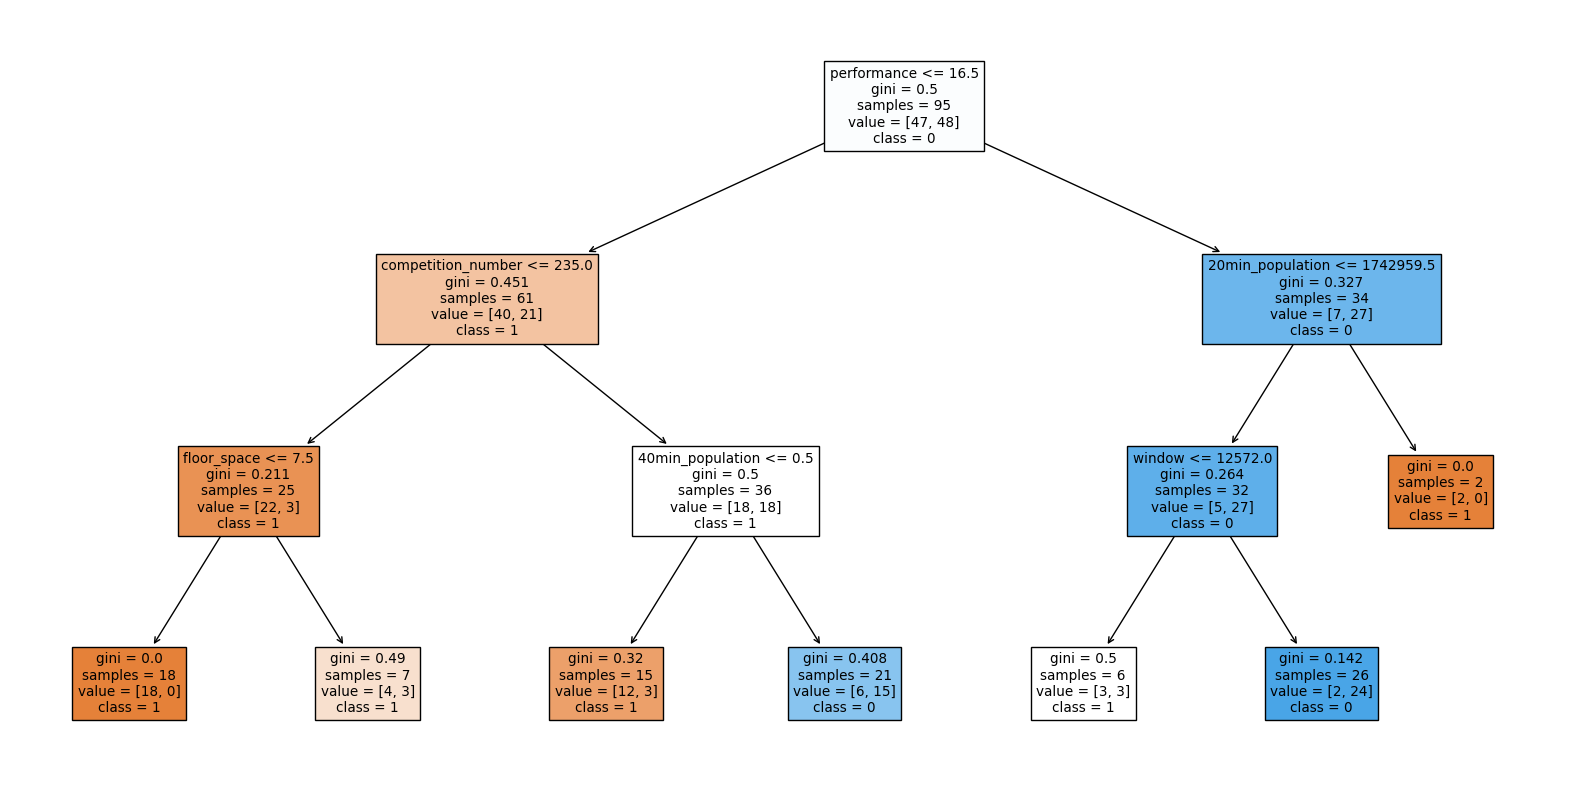

In [127]:
from sklearn.tree import DecisionTreeClassifier
# running ML decision tree
y_names = ['1', '0']
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree, feature_names = x_names, class_names = y_names, filled = True)

In [128]:
# rebuilding a tree
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', 
                                    max_leaf_nodes = 10, min_samples_leaf = 5, max_depth=5)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

# prunning the decision tree

In [129]:
DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = 5,
                       max_features = None, max_leaf_nodes = 10, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='random'
                      )

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [130]:
score2 = dtree.score(x_test, y_test)
score2

0.7073170731707317

In [131]:
score2 = dtree.score(x_train, y_train)
score2

0.7789473684210526

In [132]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [235]:
tree = dtree
dtree.fit(x,y)
y_pred = dtree.predict(x)
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

[[57 10]
 [20 49]]


# observations after prunning
1. From the train confusion matrix, the % of predictions (Accuracy) that were correct is 80%
2. % of predcitions that were wrong is 22%
3. % of positive cases the model matched is 85%
4. % of 'Bad' performance predicted as 'Good' performance is 29%
5. % of 'Bad' performance predicted as 'Bad' performance is 71%
6. The precision and exactness of the positive predictions that were correct is 74%

# Conclusion
Two models (Logistic Regression and Decision Tree) were used according to the project question to predict the store performance of either good or bad, it was shown that Decision Tree is the best model for the prediction because it provides accuracy of 85%, on the test dataset. Also, considering the top 5 features such as window, 10min_population, 20min_population, 30min_population, and floor_space due to preprocessing, if the values of these features are increased, this means store has very high chance of getting good performance.